In [1]:
# back to project root
%cd ~/research

import gc
import os
import sys
from glob import glob

import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import yaml
from scipy import signal

sys.path.append("src")
from utility.logger import logger
from utility.activity_loader import get_data_dirs, load_group
from utility.json_handler import load
from utility.video import Capture, Writer, concat_field_with_frame
from visualize.group import GroupVisualizer
from visualize.individual import write_field as ind_write_field
from visualize.keypoint import write_frame as kps_write_frame

/raid6/home/yokoyama/research


/home/yokoyama/research/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
room_num = "02"
surgery_num = "001"

In [36]:
cfg_path = "config/demo_config.yaml"
with open(cfg_path, "r") as f:
    cfg = yaml.safe_load(f)
with open(cfg["config_path"]["group"], "r") as f:
    grp_cfg = yaml.safe_load(f)

In [37]:
field = cv2.imread("image/field.png")
visualizer = GroupVisualizer(["passing"])

In [38]:
data_dirs = get_data_dirs(room_num, surgery_num)
print(data_dirs)

['data/02/001/01', 'data/02/001/02', 'data/02/001/03', 'data/02/001/04', 'data/02/001/05', 'data/02/001/06', 'data/02/001/07', 'data/02/001/08', 'data/02/001/09', 'data/02/001/10', 'data/02/001/11', 'data/02/001/12', 'data/02/001/13', 'data/02/001/14', 'data/02/001/15']


In [39]:
th_duration = 10
th_interval = 30

def calc_start2end(group, th_duration, th_interval):
    passing_dict = group.passing

    result_dict: Dict[str, list] = {}
    for pair_key, passing_frame_nums in passing_dict.items():
        result_dict[pair_key] = []

        pre_frame_num = start_frame_num = passing_frame_nums[0]
        for frame_num in passing_frame_nums[1:]:
            if frame_num - pre_frame_num > th_interval:
                # difference between current and previous is over interval
                if pre_frame_num - start_frame_num > th_duration:
                    # append result beyond with duration
                    result_dict[pair_key].append((start_frame_num, pre_frame_num))

                start_frame_num = frame_num  # update start frame number

            pre_frame_num = frame_num  # update previous frame number
        else:
            # process for last frame number
            if pre_frame_num - start_frame_num > th_duration:
                # append result beyond with duration
                result_dict[pair_key].append((start_frame_num, pre_frame_num))

        if len(result_dict[pair_key]) == 0:
            del result_dict[pair_key]

    return result_dict

In [40]:
passings = {}
for i, data_dir in enumerate(data_dirs):
    print(data_dir)
    json_path = os.path.join(data_dir, ".json", "group.json")
    if os.path.exists(json_path):
        group = load_group(json_path, grp_cfg, field, logger, only_data_loading=True)
        passings[f"{i + 1:02d}"] = calc_start2end(group, th_duration, th_interval)

data/02/001/01


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 112/112 [00:00<00:00, 325771.18it/s]


data/02/001/02


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2184/2184 [00:00<00:00, 850860.11it/s]


data/02/001/03


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2691/2691 [00:00<00:00, 290688.99it/s]


data/02/001/04


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3577/3577 [00:00<00:00, 949558.57it/s]


data/02/001/05


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2893/2893 [00:00<00:00, 709473.28it/s]


data/02/001/06


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4158/4158 [00:00<00:00, 879648.75it/s]


data/02/001/07


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2866/2866 [00:00<00:00, 773345.04it/s]


data/02/001/08


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2239/2239 [00:00<00:00, 349161.46it/s]


data/02/001/09


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 934/934 [00:00<00:00, 278943.32it/s]


data/02/001/10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1744/1744 [00:00<00:00, 696587.58it/s]


data/02/001/11


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6143/6143 [00:00<00:00, 916338.63it/s]


data/02/001/12


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2587/2587 [00:00<00:00, 684196.01it/s]


data/02/001/13


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1548/1548 [00:00<00:00, 771205.91it/s]


data/02/001/14


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 692/692 [00:00<00:00, 590771.09it/s]


data/02/001/15


0it [00:00, ?it/s]


In [41]:
passings["01"]

{'43_72': [(9083, 9104)],
 '62_69': [(10275, 10305)],
 '205_236': [(31295, 31310)],
 '242_246': [(33269, 33290), (33657, 33685)]}

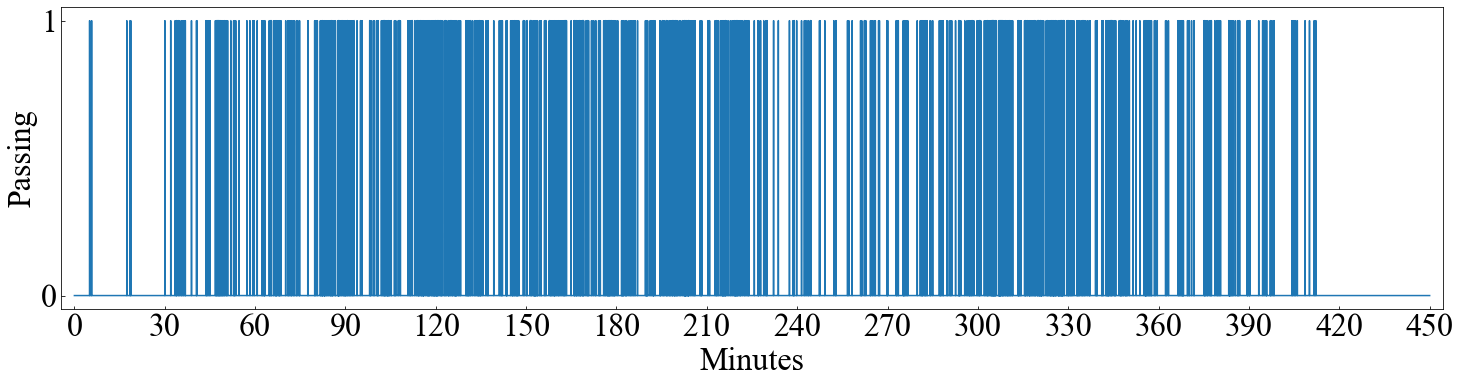

In [43]:
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams["font.size"] = 32
plt.rcParams['xtick.direction'] = 'in'  # x axis in
plt.rcParams['ytick.direction'] = 'in'  # y axis in

frame_total = 54000

results = np.empty((1,))
for i, predict_dict in passings.items():
    i = int(i)
    
    result = np.zeros(frame_total)
    for pair_key, predicts in predict_dict.items():
        for (start_frame, end_frame) in predicts:
            result[start_frame:end_frame] = 1
    results = np.append(results, result)
    
fig = plt.figure(figsize=(20, 5))
plt.plot(results)
fig.subplots_adjust(left=0.035, right=0.995, bottom=0.15, top=0.99)

xticks = range(0, len(results), 1800 * 30)
plt.xticks(xticks, [t // 1800 for t in xticks])
plt.yticks([0, 1])

margin = len(results) // 100
plt.xlim((-margin, len(results) + margin))
plt.ylim((-0.05, 1.05))

plt.xlabel("Minutes")
plt.ylabel("Passing")

plt.savefig(os.path.join("data", "passing", "image", f"{room_num}_{surgery_num}.pdf"))
plt.show()